# Polynomial Regression

In [24]:
# Can be considered as a special case for SLR

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image

## Importing the dataset

In [3]:
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = df.iloc[:, 1].values.reshape(-1,1)
Y = df.iloc[:, -1].values

### Polynomial Linear Regression Pipeline

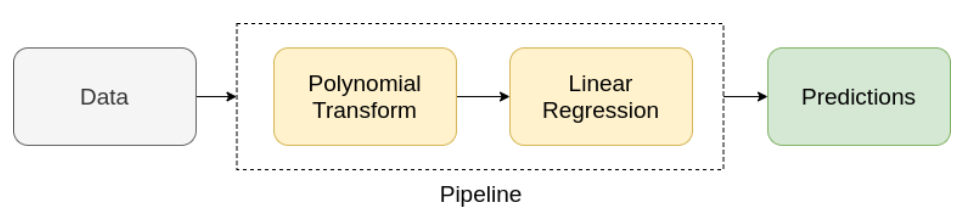

In [21]:
Image('CAPTURE2.PNG', width=700,height=450, embed=True)

## Training the Linear Regression model on the whole dataset

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression()

In [6]:
lin_reg.coef_, lin_reg.intercept_

(array([80878.78787879]), -195333.33333333337)

$$\hat{Y} = \beta_0 + \beta_1Pos$$

$$\hat{Y} = -195333.33 + 80878.787Pos$$

## Training the Polynomial Regression model on the whole dataset

In [7]:
from sklearn.preprocessing import PolynomialFeatures

#feature transformation
poly_tranformer = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_tranformer.fit_transform(X)

#model training
poly_lin_reg = LinearRegression()
poly_lin_reg.fit(X_poly, Y)

LinearRegression()

In [23]:
# If there were more than 1 feature, say n features in X, PolynomialFeatures, for n predictors, X_poly would include all 
# the possible combinations of different order polynomials.This is known as Multi-dimensional Polynomial Regression.
# For eg, ig n=2 and PolynomialFeatures(degree=3), then :-

$$\hat{Y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_1x_2 + \beta_4x_1x_2^2 + \beta_5x_1^2x_2 + \beta_6x_1^3 + \beta_7x_2^3$$

In [ ]:
# But, there is a major issue with multi-dimensional Polynomial Regression – multicollinearity. Multicollinearity is the 
#interdependence between the predictors in a multiple dimensional regression problem. This restricts the model from fitting 
# properly on the dataset.

In [8]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [9]:
X_poly.shape

(10, 4)

In [10]:
df2 = pd.DataFrame({f"Pos^{x+1}":X_poly[:,x] for x in range(X_poly.shape[1])})
df2

,Pos^1,Pos^2,Pos^3,Pos^4
0,1.0,1.0,1.0,1.0
1,2.0,4.0,8.0,16.0
2,3.0,9.0,27.0,81.0
3,4.0,16.0,64.0,256.0
4,5.0,25.0,125.0,625.0
5,6.0,36.0,216.0,1296.0
6,7.0,49.0,343.0,2401.0
7,8.0,64.0,512.0,4096.0
8,9.0,81.0,729.0,6561.0
9,10.0,100.0,1000.0,10000.0


In [11]:
df2.corr() # multicollinearity ....??!! Doesn't multicollinearity affect the polynomial regression??

,Pos^1,Pos^2,Pos^3,Pos^4
Pos^1,1.000000,0.974559,0.928391,0.881678
Pos^2,0.974559,1.000000,0.987180,0.961479
Pos^3,0.928391,0.987180,1.000000,0.992723
Pos^4,0.881678,0.961479,0.992723,1.000000


In [12]:
 poly_lin_reg.intercept_, poly_lin_reg.coef_

(184166.6666665962,
 array([-211002.33100231,   94765.44289044,  -15463.28671329,
            890.15151515]))

$$\hat{Y} = \beta_0 + \beta_1Pos +\beta_2Pos^2 + \beta_3Pos^3 + + \beta_4Pos^4$$

$$\hat{Y} = 184166.66 + (-211002.33)Pos + 94765.44Pos^2 + -15463.28Pos^3 + 890.15Pos^4$$

## Visualising the Linear Regression results

In [93]:
lin_reg.predict(X)

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

<IPython.core.display.Javascript object>


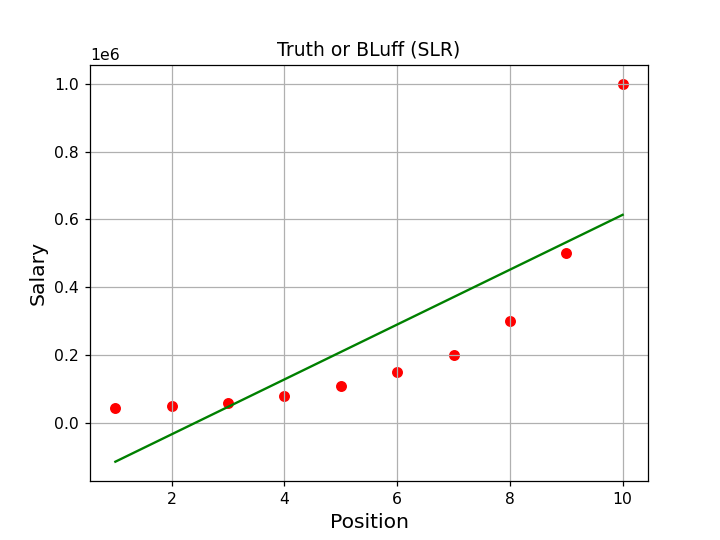

In [25]:
%matplotlib notebook
plt.scatter(X, Y, color='red')
plt.plot(X, lin_reg.predict(X), color='green')
plt.plot(X)
plt.grid()
plt.title('Truth or BLuff (SLR)')
plt.xlabel('Position', fontsize=13)
plt.ylabel('Salary', fontsize=13)
plt.show()

### $R^2$

In [13]:
from sklearn.metrics import r2_score
r2_score(Y, lin_reg.predict(X))

0.6690412331929895

## Visualising the Polynomial Regression results

In [14]:
poly_lin_reg.predict(X_poly)

array([ 53356.64335659,  31759.90675987,  58642.19114216,  94632.86713284,
       121724.94172493, 143275.05827505, 184003.49650351, 289994.1724942 ,
       528694.63869469, 988916.08391616])

<IPython.core.display.Javascript object>


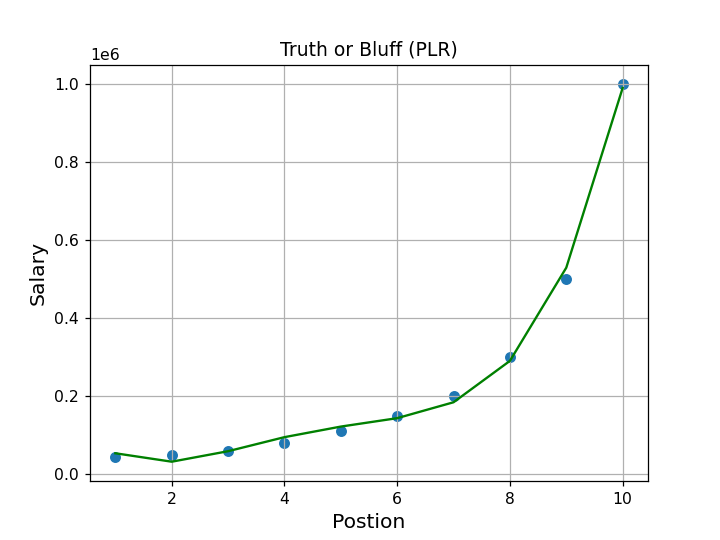

In [16]:
%matplotlib notebook
plt.scatter(X, Y)
plt.plot(X, poly_lin_reg.predict(X_poly), color='green')
plt.grid()
plt.title('Truth or Bluff (PLR)')
plt.xlabel('Postion', fontsize=13)
plt.ylabel('Salary', fontsize=13)
plt.show()

### $R^2$

In [17]:
#with intercept term
r2_score(Y, poly_lin_reg.predict(X_poly))

0.9973922891706611

In [46]:
#without intercept term i.e fit_intercept=False, accuracy is slightly less as even all the predictions are sligtly less that
# the model with fit_intercept=True
r2_score(Y, poly_lin_reg.predict(X_poly))

0.9935405073988421

<IPython.core.display.Javascript object>


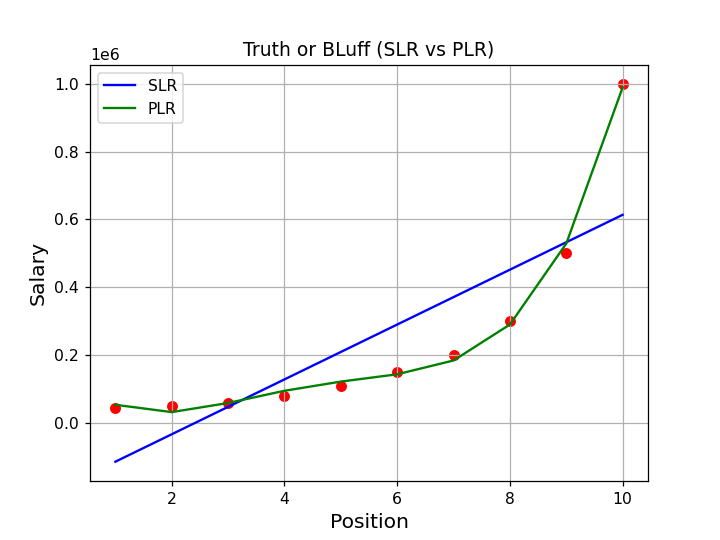

In [18]:
plt.scatter(X, Y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue', label='SLR')
plt.plot(X, poly_lin_reg.predict(X_poly), color='green', label='PLR')
plt.grid()
plt.title('Truth or BLuff (SLR vs PLR)')
plt.xlabel('Position', fontsize=13)
plt.ylabel('Salary', fontsize=13)
plt.legend()
plt.show()

## Predicting a new result with Linear Regression

In [36]:
lin_reg.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [55]:
poly_lin_reg.predict(poly_tranformer.transform([[6.5]]))

array([158862.45265152])

In [104]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


## How to select the correct order

### Base Information Criteria (BIC), thanks to Bayes

$$BIC_k = n\log{(SSE)} + k\log{(n)}$$

$n = no. of datapoints$

$k = no. of parameters/betas$

#### $BIC_k$ is calculted for every model with different orders. Then a a graph is plotted of Polynomial model order v/s BIC. Looking 
#### at the plot, minimum BIC level is found and that model with corresponding polynomial order is selected. (Beware of overfitting though)

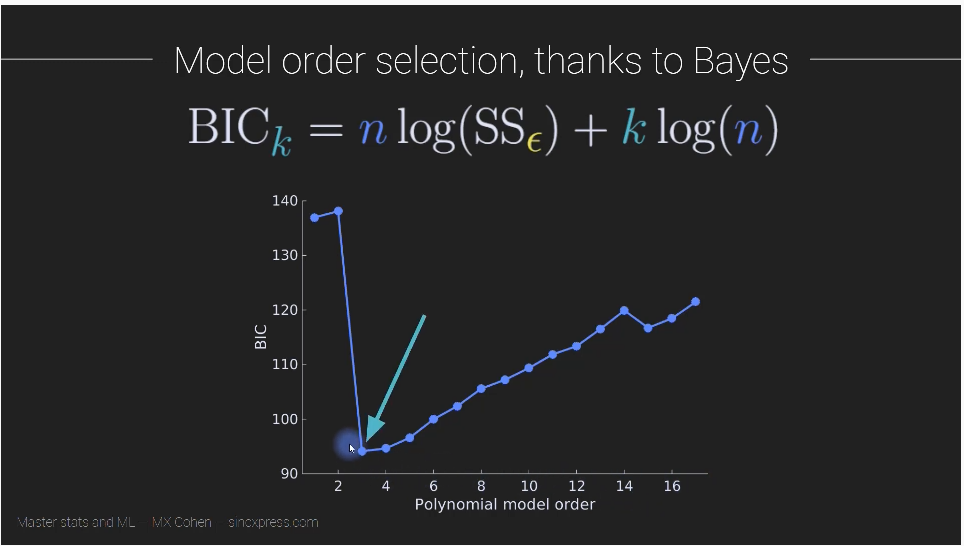

In [22]:
Image('CAPTURE1.PNG', width=900,height=850, embed=True)

In [1]:
# how to know if the dataset is linear or non linear wrt target variable if there 
#are more than 3 features (we cannot use a simple scatterplot).